In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sridhariyer/anaconda/envs/srienv/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
class TimeSeriesData():
    def __init__(self,num_points,xmin,xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)

    def next_batch(self,batch_size,steps,return_batch_ts=False):
        # Grab a random starting poiny for each batch of data
        rand_start = np.random.rand(batch_size,1)
        
        # Convert to be on time series
        ts_start = rand_start * (self.xmax - self.xmin - (steps * self.resolution))
        
        # Create batch time series on the X Axis
        batch_ts = ts_start + np.arrange(0.0,steps+1) * self.resolution
        
        
        # Create the Y data for the time series X axis from previous step
        y_batch = np.sin(batch_ts)
        
        # FORMATTING for RNN
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1), batch_ts
        else:
            y_batch[:, :-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)
            

In [5]:
ts_data = TimeSeriesData(250,0,10)

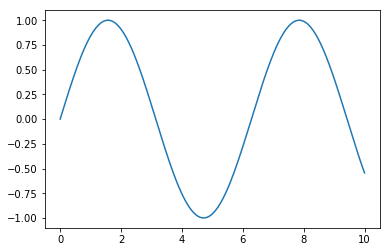

In [6]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [7]:
num_time_steps = 30

In [8]:
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

AttributeError: module 'numpy' has no attribute 'arrange'

In [ ]:
ts.fla